In [ ]:
!unzip "/content/Cry_Testing.zip"

Streaming output truncated to the last 5000 lines.
  inflating: Testing/train/images/NormalBaby-40-_jpeg.rf.c70631fa241956aa29df7efa289217c0.jpg  
  inflating: Testing/train/images/NormalBaby-402-_jpg.rf.34f549496e90addecc78a73767d81725.jpg  
  inflating: Testing/train/images/NormalBaby-405-_jpg.rf.138bf08ea9c3a26b01b50d0fcd5c1013.jpg  
  inflating: Testing/train/images/NormalBaby-41-_jpg.rf.5c818f73af585185f1fbe1e5f9ac4e6b.jpg  
  inflating: Testing/train/images/NormalBaby-41-_jpg.rf.e281f8b24d88916f6d63810c1b9d9a7d.jpg  
  inflating: Testing/train/images/NormalBaby-412-_jpg.rf.a50d1afe29513e6542066471377fbb7b.jpg  
  inflating: Testing/train/images/NormalBaby-412-_jpg.rf.af9c58a4f7f0fb9add9b94b891ddd0cd.jpg  
  inflating: Testing/train/images/NormalBaby-42-_jpeg.rf.0dc0186ed8ba5072a9187fc80092d2e5.jpg  
  inflating: Testing/train/images/NormalBaby-420-_jpg.rf.e676d78fb841151993a1cd89e58a6845.jpg  
  inflating: Testing/train/images/NormalBaby-425-_jpg.rf.0d6b156484018e8e86856ebd5e80ba

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/gvc.zip"

Archive:  /content/gvc.zip
  inflating: p/gvc_0.jpg             
  inflating: p/gvc_1.jpg             
  inflating: p/gvc_2.jpg             
  inflating: p/gvc_3.jpg             
  inflating: p/gvc_4.jpg             
  inflating: p/gvc_5.jpg             
  inflating: p/gvc_6.jpg             
  inflating: p/gvc_7.jpg             
  inflating: p/gvc_8.jpg             
  inflating: p/gvc_9.jpg             


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-296-gae4ef3b2 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 50 --data /content/data.yaml --weights yolov5s.pt --cache

2024-03-15 08:37:30.511713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 08:37:30.511810: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 08:37:30.639318: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=Fals

#1 Gambar


In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/1.jpg


detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/1.jpg: 640x640 1 Cry, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 592.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


# 1 Folder

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/yolov5/New\ folder


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source /content/Happy (6)_face_1.jpg'


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


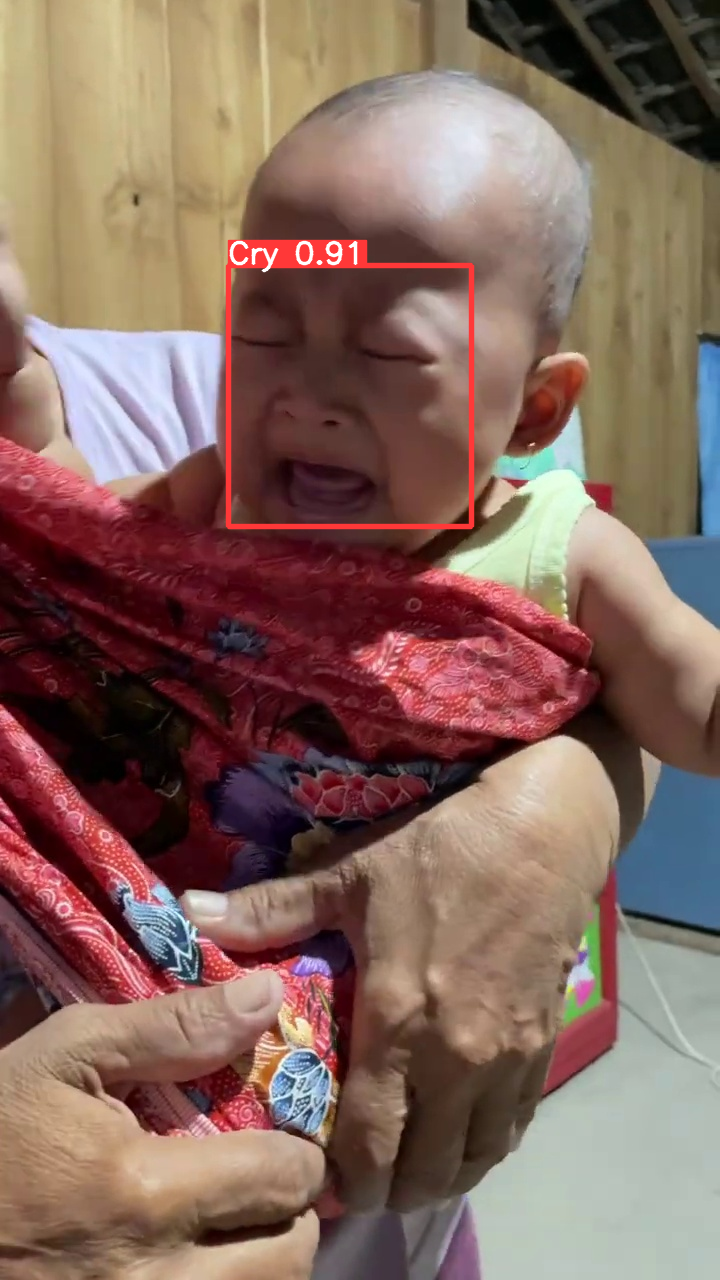

In [ ]:
import torch
from PIL import Image

def detect_objects(weights, source, img_size=640, conf_thresh=0.25):
    # Load model
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights)

    # Detect objects in the image
    results = model(source, size=img_size)

    # Display results
    results.show()

# Contoh pemanggilan fungsi detect_objects
detect_objects(weights='/content/yolov5/runs/train/exp2/weights/best.pt', source='/content/yolov5/p/gvc_3.jpg')


In [ ]:
import torch
from PIL import Image

def detect_objects(weights, source, img_size=640, conf_thresh=0.25):
    # Load model
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights)

    # Detect objects in the image
    results = model(source, size=img_size)

    # Extract detected objects and their confidence scores
    detected_objects = results.xyxy[0]  # Get detected objects from first image (assuming only one image)

    # Filter objects based on confidence threshold
    detected_objects = detected_objects[detected_objects[:, 4] > conf_thresh]

    # Get class names of detected objects
    class_names = model.module.names if hasattr(model, 'module') else model.names

    # Extract class predictions
    class_predictions = [class_names[int(obj[5])] for obj in detected_objects]

    # Display text predictions
    print("Detected objects:")
    for i, pred in enumerate(class_predictions):
        print(f"{i+1}. {pred}")

# Contoh pemanggilan fungsi detect_objects
detect_objects(weights='/content/yolov5/runs/train/exp/weights/best.pt', source='/content/yolov5/p/gvc_3.jpg')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-290-gb2ffe055 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Detected objects:
1. Cry


In [ ]:
import torch
from PIL import Image

def detect_objects(weights, source, img_size=640, conf_thresh=0.25):
    # Load model
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights)

    # Detect objects in the image
    results = model(source, size=img_size)

    # Extract detected objects and their confidence scores
    detected_objects = results.xyxy[0]  # Get detected objects from first image (assuming only one image)

    # Filter objects based on confidence threshold
    detected_objects = detected_objects[detected_objects[:, 4] > conf_thresh]

    # Get class names of detected objects
    class_names = model.module.names if hasattr(model, 'module') else model.names

    # Extract class predictions
    class_predictions = [class_names[int(obj[5])] for obj in detected_objects]

    # Display text predictions
    print("Detected objects:")
    for pred in class_predictions:
        print(pred)

# Contoh pemanggilan fungsi detect_objects
detect_objects(weights='/content/yolov5/runs/train/exp2/weights/best.pt', source='/content/yolov5/p/gvc_3.jpg')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-294-gdb125a20 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded


Detected objects:
Cry
